# Linear Programming 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
from numpy import *
import scipy as sp
from scipy.optimize import linprog
from pulp import *
from mpl_toolkits.mplot3d import Axes3D

Maximize the following linear program 
\begin{align*}
&max\{P + 2B + 3H\}\\
&s.t\\
2P + 3B& \leq 1200 \\
B + 2H& \leq 400 \\
P \leq& \  400 \\
B \leq& \  300 
\end{align*}

To use Scipy's optimization functions, we have to apply a simple transformation to our program to convert the problem into a minimization problem. 

Hence we multiply the coefficients of the objective function by $−1$.

In [3]:
obj = [-1,-2,-3]
l = [[2,3,0], [0,1,2]]
r = [[1200], [400]]
p_bounds = (None, 400)
b_bounds = (None, 300)
h_bounds = (None, None)

In [4]:
result = linprog(obj, A_ub=l, b_ub=r, bounds = [p_bounds, b_bounds, h_bounds])

In [5]:
result.x

array([399.9999999 , 133.33333366, 133.33333307])

## LAD (HW 7 Q5)

One of the most important problems in the field of statistics is the linear regression problem. Roughly speaking, this problem involves fitting a straight line to statistical data represented by points (x1,y1),(x2,y2),...,(xn,yn) on a graph. Denoting the line by y = a + bx, the objective is to choose the constants a and b to provide the “best” fit according to some criterion. The criterion usually used is the method of least squares, but there are other interesting criteria where linear programming can be used to solve for the optimal values of a and b.
Suppose instead we wish to minimize the sum of the absolute deviations of the data from
the line, that is,  $$z_i = min\{\sum^n_{i = 1} |y_i  - (a + bx_i)|\}$$

Write a linear program with variables a, b to solve this problem.
Hint: Create a new variable zi that will equal |yi − (a + bxi)| in the optimal solution.

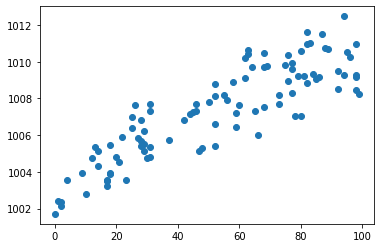

In [24]:
N = 100
x_arr = np.random.randint(N, size = N) 
y_arr = np.random.rand(N) + np.random.normal(1000, size = N) + cos(x_arr) + x_arr**(9/18)

plt.scatter(x_arr,y_arr)

Suppose our objective function is $$z_i = min\{\sum^n_{i = 1} |y_i  - (a + bx_i)|\}$$

Then our linear program would be 
\begin{align*}
&min \ \sum z_i\\
&s.t\\
z  \geq y_i - (a + bx_i) \\
z \geq -y_i  + (a + bx_i)  \\ 
z \geq 0
\end{align*}

In [25]:
# Initialize the objective function 
model = LpProblem(name="lad", sense=LpMinimize)
# Initialize the decision variables
a = LpVariable("a")
b = LpVariable("b")
z = []
for i in range(N):
    z.append(LpVariable("z{}".format(i+1)))

In [26]:
model += sum(z)

for i in range(N):
    model += z[i] >= y_arr[i] - (a + x_arr[i] * b)
    model += z[i] >= -y_arr[i] + (a + x_arr[i] * b)

In [27]:
model.solve()
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")
print("Optimal variable we get are, a = {}, b = {}".format(value(a), value(b)))

status: 1, Optimal
objective: 103.45095181129996
Optimal variable we get are, a = 1003.2573, b = 0.076606296


In [28]:
line = []
for i in range(N):
    line.append(value(a) + value(b) * x_arr[i])

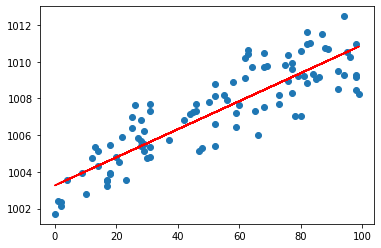

In [29]:
plt.scatter(x_arr,y_arr)
plt.plot(x_arr, line,  color="red")

## Jeweler (HW 7 Q4)

You are a jeweler who sells necklaces and rings. Each necklace takes 4 ounces of gold and 2 diamonds to produce, each ring takes 1 ounce of gold and 3 diamonds to produce. You have 80 ounces of gold and 90 diamonds. You make a profit of 60 dollars per necklace you sell and 30 dollars per ring you sell, and want to figure out how many necklaces and rings to produce to maximize your profits.

(a) Formulate this problem as a linear programming problem. Draw the feasible region, and find the solution (state the cost function, linear constraints, and all vertices except for the origin).

(b) Suppose instead that the profit per necklace is C dollars and the profit per ring remains at 30 dollars. For each vertex you listed in the previous part, give the range of C values for which that vertex is the optimal solution.

Maximize the following linear program 
\begin{align*}
&max\{60n + 30r\}\\
&s.t\\
4n + 1r \leq 80 \\
2n + 3r \leq 90
\end{align*}

In [31]:
obj = [-60, -30]
l = [[4,1], [2,3]]
r = [[80], [90]]
nb = (0, None)
rb = (0, None)

In [32]:
linprog(obj, A_ub=l, b_ub=r, bounds = [nb,rb])

     con: array([], dtype=float64)
     fun: -1499.9999993929991
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([3.23632463e-08, 3.64403263e-08])
  status: 0
 success: True
       x: array([14.99999999, 19.99999999])

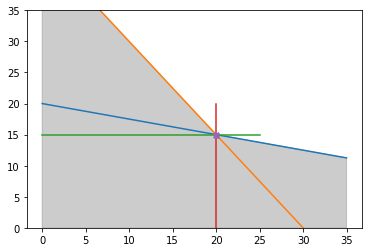

In [36]:
x = np.linspace(0, 35, 2000)
y1 = 20 - x/4
y2 = 45 - 3*(x/2)
y3 = np.maximum(y1, y2)
plt.fill_between(x, y3, color='grey', alpha=0.4)
plt.plot(x, y1, label=r'$4n + 1r \leq 80$')
plt.plot(x, y2, label=r'$2n + 3r \leq 90$')
plt.ylim(0,35)
# plt.plot([0,25], [15,15])
# plt.plot([20,20], [0,20])
plt.plot(20,15, marker = 'X')
# plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig('lp_fig_f.png')

## Meal Replacement (HW8 Q4)
We are trying to eat cheaply but still meet our minimum dietary needs. We want to consume at least 500 calories of protein per day, 100 calories of carbs per day, and 400 calories of fat per day. We have three options for food we’re considering buying: meat, bread, and protein shakes. 
􏲿

- We can consume meat, which costs 5 dollars per pound, and gives 500 calories of protein and 500 calories of fat per pound. 


- We can consume bread, which costs 2 dollars per pound, and gives 50 calories of protein, 300 calories of carbs, and 25 calories of fat per pound.


- We can consume protein shakes, which cost 4 dollars per pound, and gives 300 calories of protein, 100 calories of carbs, and 200 calories of fat per pound.


Our goal is to find a combination of these options that meets our daily dietary needs while being as cheap as possible.

$$\begin{cases}
    \text{min}\{5m + 2b + 4ps\} \\ 
    s.t. \\
    500m + 50b + 300ps \geq 500 \\
    300b + 100ps \geq 100 \\
    500m + 25b + 200ps \geq 400 \\
    m \geq 0 \\
    b \geq 0 \\
    ps \geq 0
    \end{cases}$$

In [7]:
prob = LpProblem("hw8Q4",LpMinimize)

In [8]:
m = LpVariable("meat", lowBound = 0, cat="Integer")
b = LpVariable("bread", lowBound=0,cat="Integer")
ps = LpVariable("protein shake", lowBound=0,cat="Integer")

In [9]:
prob += 5*m + 2*b + 4*ps, "Total Cost of the meal"

prob += 500*m + 50*b +  300*ps >= 500

prob += 300*b + 100*ps >= 100

prob += 500*m + 25*b + 200*ps >= 400

In [10]:
prob.solve()
for v in prob.variables():
    print(v.name, "=", v.varValue)

bread = 1.0
meat = 1.0
protein_shake = 0.0


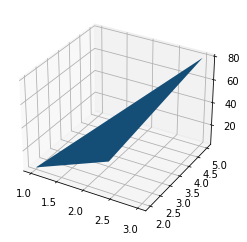

In [54]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.linspace(0, 1, 10)

ax.plot_trisurf((1,2,3), (2,3,5), (4,7,80))

## Vertex Cover Dual 

In [4]:
import networkx as nx 
from networkx import *

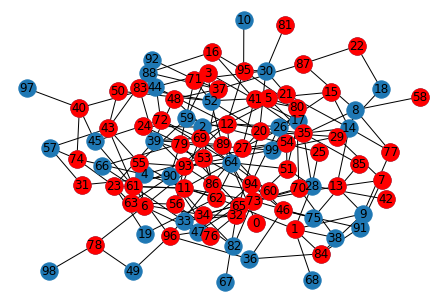

In [7]:
n = 100  # 10 nodes
m = 200 # 20 edges

G = nx.gnm_random_graph(n, m)

# some properties
# print("node degree clustering")
# for v in nx.nodes(G):
#     print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

# print()
# print("the adjacency list")
# for line in nx.generate_adjlist(G):
#     print(line)

pos = nx.kamada_kawai_layout(G)  # positions for all nodes
max_independent_set = maximal_independent_set(G)
nx.draw(G, pos, with_labels=True)
vertex_cover = list(G.nodes - max_independent_set)
nx.draw_networkx_nodes(G, pos, nodelist=vertex_cover, node_color="r")
plt.show()